In [1]:
from ml5_ipynb import ml5_detector

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Single Object Detection

In [3]:
img_path = 'pic/bird1.jpg'
img = cv2.imread(img_path)
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
width = 640
height = 420
resize_size = (width, height)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape

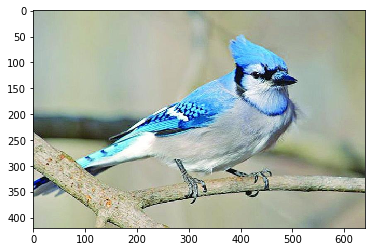

In [4]:
plt.imshow(img_rgba)

In [5]:
model1 = ml5_detector.ObjectDetector('yolo')

..........Modeal is ready


In [6]:
model1.image_detect(img_rgba,width=width,height=height)

.........done


In [7]:
model1.detect_result

[{'label': 'bird',
  'confidence': 0.4731246531009674,
  'x': 7.737879753112793,
  'y': 0,
  'width': 395.5835313796997,
  'height': 415.0276794433594,
  'normalized': {'x': 0.018600672483444214,
   'y': 0,
   'width': 0.9509219504319705,
   'height': 0.9976626909696139}}]

bird 11 0 608 419


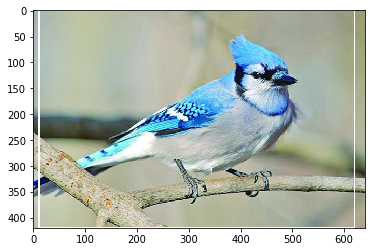

In [8]:
model1.draw_bounding_box(img_rgba)

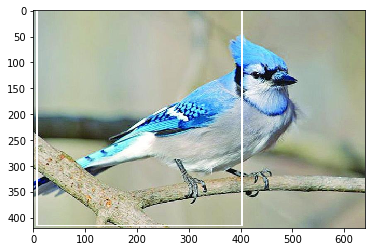

In [9]:
model1.draw_bounding_box(img_rgba, normalized=False)

# Multiple Objects Detection

### Example 1

In [10]:
img_path = 'pic/faces.jpg'
img = cv2.imread(img_path)
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
width = 800
height = 600
resize_size = (width, height)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape

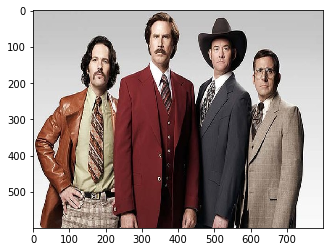

In [11]:
plt.imshow(img_rgba)

In [12]:
model_multi = ml5_detector.ObjectDetector('yolo')

........Modeal is ready


In [13]:
model_multi.image_detect(img_rgba,width=width,height=height)

.....................done


tie 345 164 24 94
person 435 23 169 569
person 582 154 155 390
tie 617 256 19 73


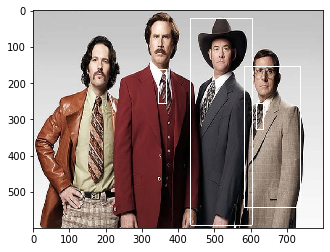

In [14]:
model_multi.draw_bounding_box(img_rgba)

### Example 2

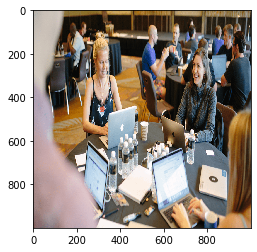

In [15]:
img_path = 'pic/meeting.png'
img = cv2.imread(img_path)
img_rgba = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
width = 1000
height = 1000
resize_size = (width, height)
img_rgba = cv2.resize(img_rgba, resize_size)
x, y, channel = img_rgba.shape
plt.imshow(img_rgba)

In [16]:
model_multi2 = ml5_detector.ObjectDetector('yolo')

.......Modeal is ready


In [21]:
model_multi2.detect_result = []
model_multi2.image_detect('pic/meeting.png',width=width,height=height)

....done


bottle 701 531 35 108
wine glass 368 447 112 242


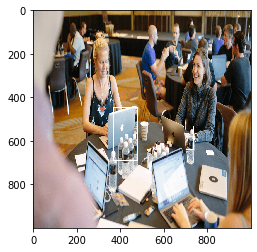

In [23]:
model_multi2.draw_bounding_box(img_rgba)